<h1>Getting the RMF matrices from the COSI response for input input source position</h1>

<h3>Import COSIpy and stuff</h3>

In [26]:
from COSIpy import *
import response
plt.style.use('thomas')

In [27]:
plt.style.use('thomas')

<h3>Load file with matrices and other infor included</h3>

In [28]:
with np.load('RMF_matrices_COSI2016_9dets_10ebins_6deg.npz') as rmf:
    rmf_matrices = rmf['rmf_matrices']
    e_edges = rmf['e_edges']
    e_cen = rmf['e_cen']
    e_wid = rmf['e_wid']
    e_min = rmf['e_min']
    e_max = rmf['e_max']
    z_edges = rmf['z_edges']
    z_cen = rmf['z_cen']
    z_wid = rmf['z_wid']
    z_min = rmf['z_min']
    z_max = rmf['z_max']
    a_edges = rmf['z_edges']
    a_cen = rmf['z_cen']
    a_wid = rmf['z_wid']
    a_min = rmf['z_min']
    a_max = rmf['z_max']
    pixel_size = rmf['pixel_size']

<h3>Shape of matrix array</h3>

In [35]:
rmf_matrices.shape

(10, 10, 60, 30)

In [36]:
# e_initial, e_measured, azimuth, zenith

<h3>Source position</h3>

In [37]:
l_src, b_src = -120., 25.

<h3>Pointing information (in COSIpy included in the Pointing class)</h3>

In [38]:
xpl, xpb = 154.179, -0.21551300000000492
ypl, ypb = 63.02699373828368, -79.40305491412697
zpl, zpb = -115.78000000000003, -10.5947

<h3>Calculating zenith and azimuth from source position and pointing information</h3>

In [39]:
zen,azi = response.zenazi(xpl,xpb,
                          ypl,xpb,
                          zpl,zpb,
                          l_src,b_src)

In [40]:
zen,azi

(35.83176821492462, 274.06649675637647)

<h3>Get index in matrix array for this zenith and azimuth combination (look-up, not interpolated)</h3>

In [41]:
# zenith indices of response
zidx = np.floor(zen/pixel_size).astype(int)
# azimuth indices of response
aidx = np.floor(pixel_size).astype(int)

# remove out of bounds indices
#weights = np.ones(1)
#zidx[zidx < 0] = 0.
#weights[zidx < 0] = 0.
#aidx[aidx < 0] = 0.
#weights[aidx < 0] = 0.

In [42]:
zidx,aidx

(5, 6)

<h3>Plotting matrix</h3>

Text(0, 0.5, 'Measured Energy [keV]')

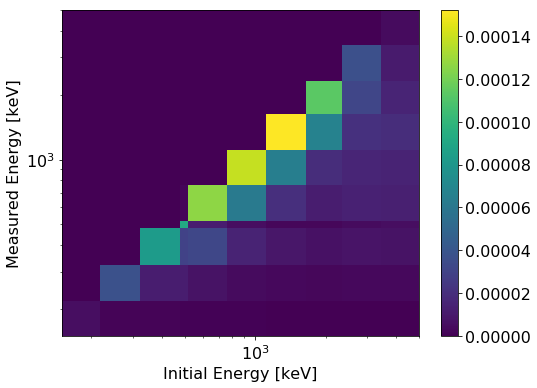

In [44]:
plt.pcolormesh(e_edges,e_edges,rmf_matrices[:,:,aidx,zidx])
plt.xscale('log')
plt.yscale('log')
plt.colorbar()
plt.xlabel('Initial Energy [keV]')
plt.ylabel('Measured Energy [keV]')